<a href="https://colab.research.google.com/github/SalvadorRdR/IAC_2022/blob/sergio/MODELO%20IGRF13/Modelo_IGRF_13_IAC2022_Fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from datetime import datetime

In [ ]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF
!pip install basemap

fatal: destination path 'ppigrf' already exists and is not an empty directory.


In [ ]:
import ppigrf
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

#Magnetic Field Plot (Function)

In [ ]:
def MagneticField(Lati,Long,Relu,):
  fig = plt.figure(figsize = (15,15))
map = Basemap(projection='mill', 
              lat_0=-55+(17+55)/2, lon_0= -105+(16+105)/2,
              llcrnrlon=-105, 
              llcrnrlat=-55, 
              urcrnrlon=16, 
              urcrnrlat=17,resolution='c')
map.drawcoastlines()
map.drawcountries(linewidth=0.5)
map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
#map.fillcontinents(color='coral',lake_color='aqua')

data=Bt

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

im=map.pcolormesh(xx, yy, data,cmap=cmap, norm=norm)
cs = map.contour(xx, yy, data, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
cbar = map.colorbar(im, location='right', pad="3%")
cbar.set_label('Bt', fontsize=13)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')

plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)


plt.show()


#Data

In [ ]:
from datetime import datetime
h   = 614       # kilometers above sea level
date = datetime(2014, 8, 17) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [ ]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.1, 0.1                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-55, 17 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-105, 16 + dx, dx)]

In [ ]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [ ]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto

##Plot

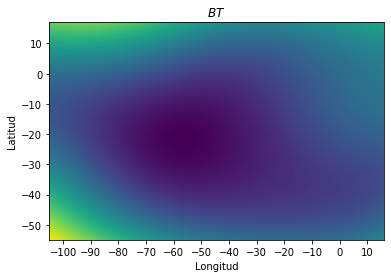

In [ ]:

plt.pcolormesh(Lon, Lat,np.squeeze(Bt))
plt.xticks(range(-100,20,10))
plt.title('$BT $')
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)

plt.show()

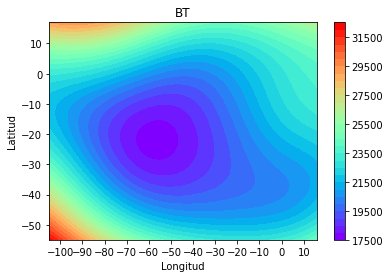

In [ ]:

Bt=np.squeeze(Bt)
levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico

fig, ax = plt.subplots()

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-100,20,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

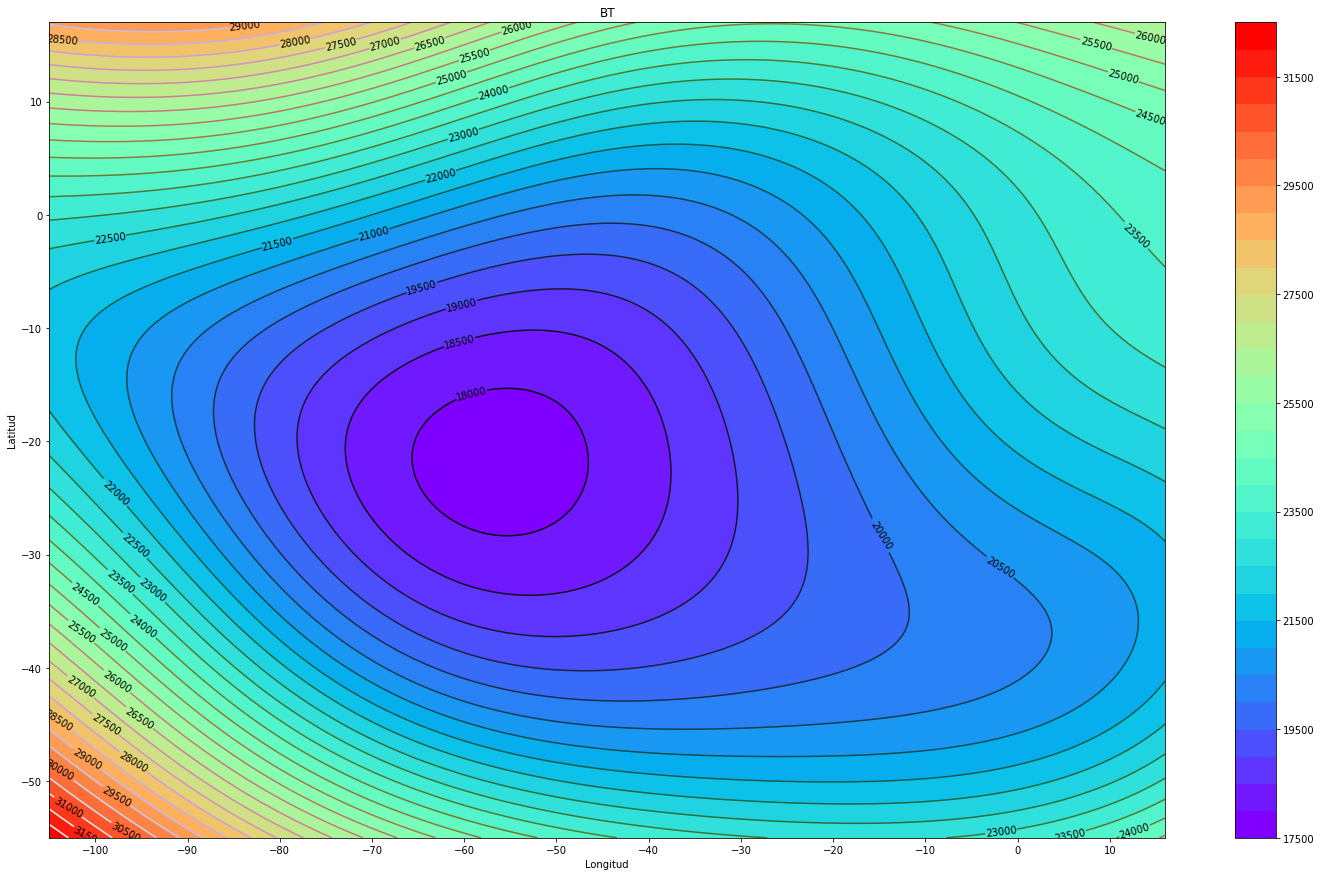

In [ ]:
Bt=np.squeeze(Bt)
levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico


fig, ax = plt.subplots(figsize = (25,15))

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
cs = plt.contour(Lon, Lat, Bt, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-100,20,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

In [ ]:
Lon.shape,Lat.shape, Bt.shape

((721, 1211), (721, 1211), (721, 1211))

#Date Frame

In [ ]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -105.0        -104.9        -104.8        -104.7        -104.6  \
-55.0  32437.056039  32416.024000  32394.989104  32373.951462  32352.911188   
-54.9  32399.958157  32378.903148  32357.845235  32336.784531  32315.721151   
-54.8  32362.870687  32341.792996  32320.712357  32299.628884  32278.542689   
-54.7  32325.794142  32304.694062  32283.590989  32262.485036  32241.376318   
-54.6  32288.729034  32267.606857  32246.481642  32225.353503  32204.222553   
...             ...           ...           ...           ...           ...   
 16.6  28904.634259  28909.273896  28913.882587  28918.460136  28923.006348   
 16.7  28947.924984  28952.589441  28957.222819  28961.824924  28966.395560   
 16.8  28991.270822  28995.959971  29000.617909  29005.244442  29009.839374   
 16.9  29034.671009  29039.384719  29044.067089  29048.717922  29053.337023   
 17.0  29078.124778  29082.862922  29087.569594  29092.244600  29096.887742   

             -104.5        -104.4       

In [ ]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [ ]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)